In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

pio.renderers.default = 'notebook'

In [2]:
# 2. Load the Dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
# 3. Check Basic Info
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
df.dtypes

Shape: (8807, 12)

Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
# 4. Data Cleaning
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

df['rating'] = df['rating'].fillna('Unknown')

df.dropna(subset=['title', 'type'], inplace=True)

df['year_added'] = df['date_added'].dt.year

df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  year_added  
0  As her father nears the end of his life, filmm...      2021.0  
1  After crossing paths at a party, a Cape Town t...      2021.0  
2  To protect his family from a powerful drug lor...      2021.0  
3  Feuds, flirtations and toilet talk go down amo...      2021.0  
4  In a city of coaching centers known to train I...      2021.0

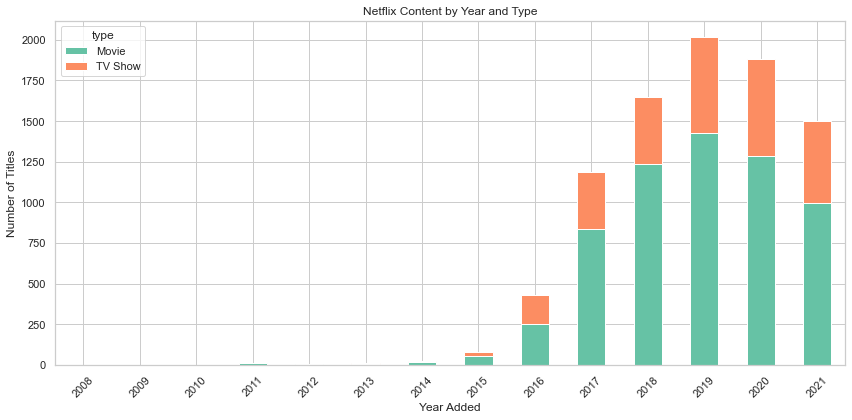

In [5]:
# 5. Plot stacked bar chart of Movies vs TV Shows by year without decimal in year labels
ax = df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])

new_labels = [str(int(float(label.get_text()))) for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels, rotation=45)

plt.title('Netflix Content by Year and Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

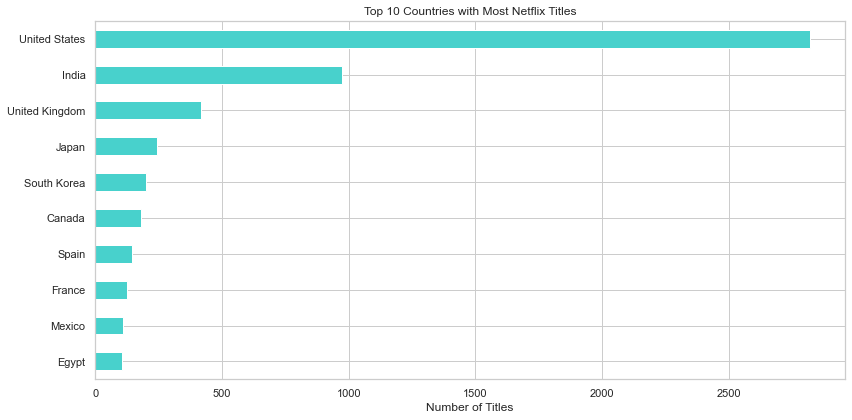

In [6]:
# 6. Plot horizontal bar chart of top 10 countries producing the most Netflix content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='mediumturquoise')

plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

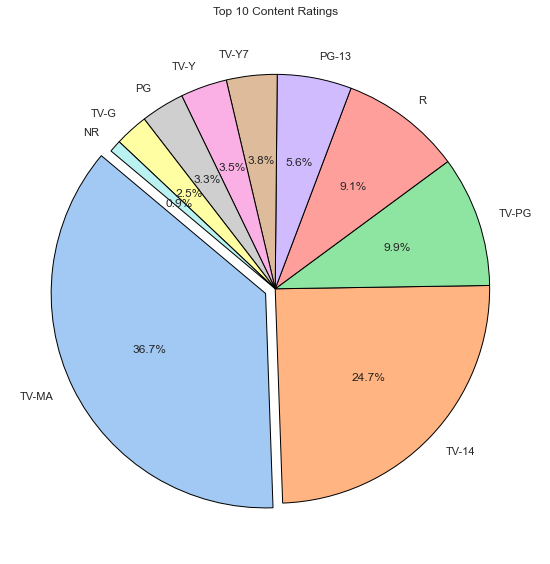

In [7]:
# 7. Plot pie chart of the top 10 most common Netflix content ratings
top_ratings = df['rating'].value_counts().head(10)
colors = sns.color_palette('pastel')
explode = [0.05] + [0]*9

plt.figure(figsize=(8, 8))
plt.pie(
    top_ratings,
    labels=top_ratings.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 10 Content Ratings')
plt.tight_layout()
plt.show()

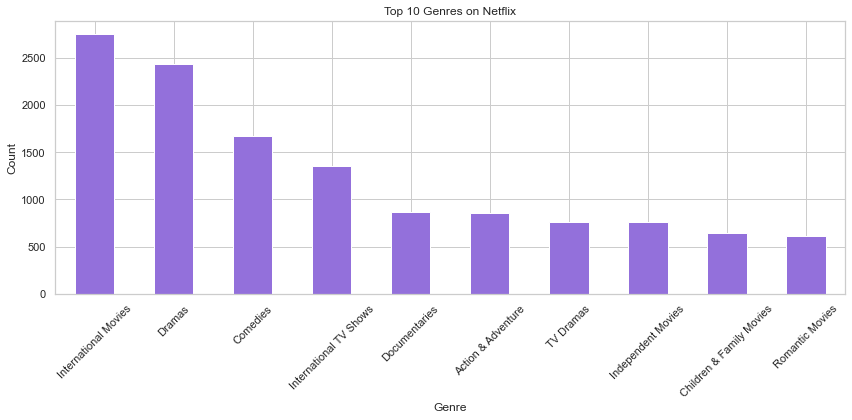

In [8]:
# 8. Plot bar chart of the top 10 most frequent genres on Netflix
genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(flat_genres).value_counts()

genre_counts.head(10).plot(kind='bar', color='mediumpurple')

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# 9. Create an interactive choropleth world map showing top 20 countries with the most Netflix titles
country_data = df['country'].value_counts().head(20).reset_index()
country_data.columns = ['country', 'count']

fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Blues',
    title='Top 20 Countries with Most Netflix Titles'
)

fig.show()

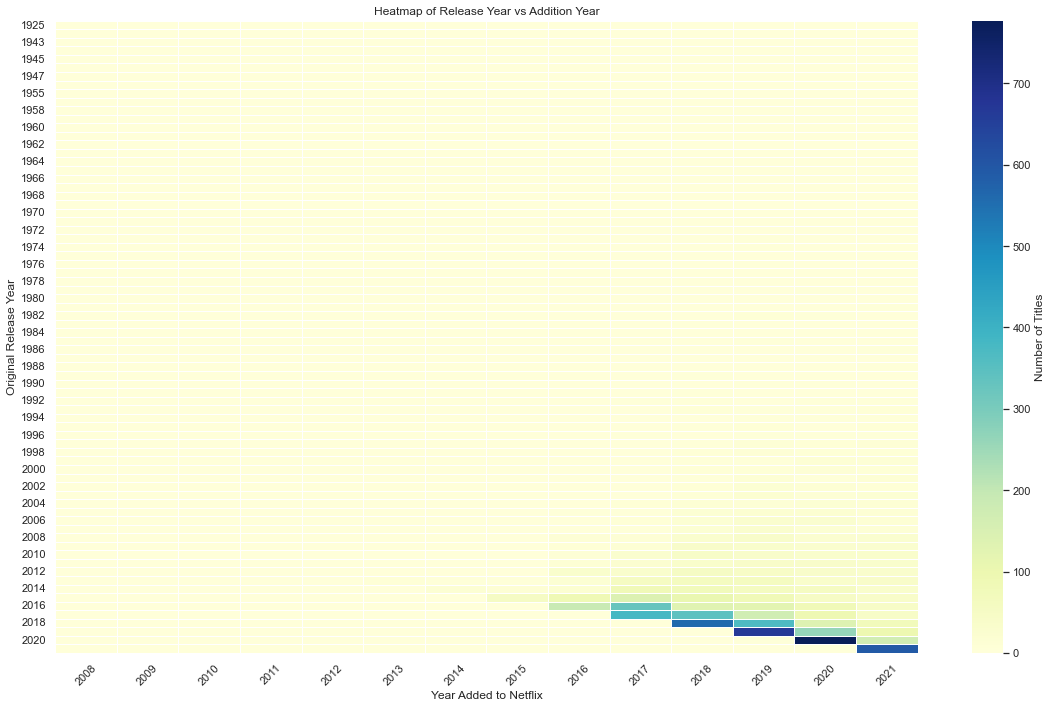

In [10]:
# 10. Create a cleaner heatmap showing the relationship between content release year and addition year on Netflix
heatmap_data = df.pivot_table(index='release_year', columns='year_added', aggfunc='size', fill_value=0)

plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Titles'}
)

ax.set_xticklabels([str(int(float(label.get_text()))) for label in ax.get_xticklabels()], rotation=45)
ax.set_yticklabels([str(int(float(label.get_text()))) for label in ax.get_yticklabels()], rotation=0)

plt.title('Heatmap of Release Year vs Addition Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Original Release Year')
plt.tight_layout()
plt.show()

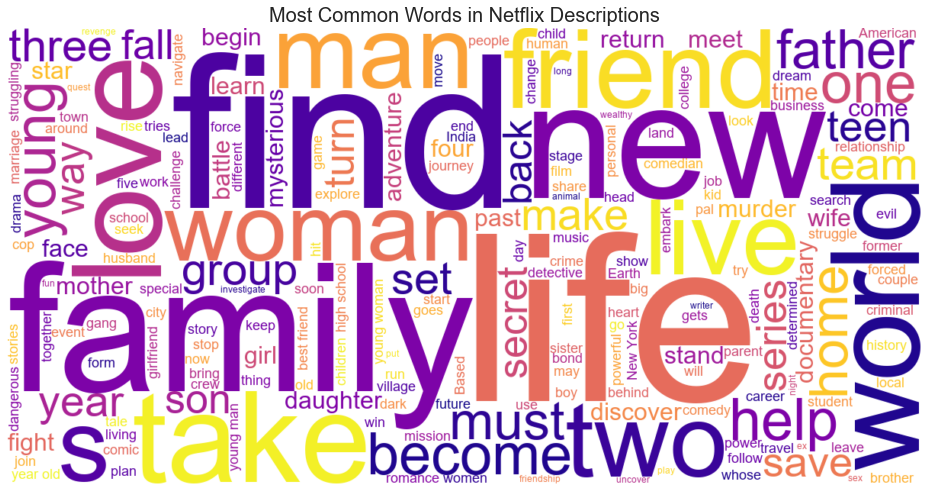

In [12]:
# 11. Create a word cloud showing the most common words in Netflix content descriptions
from PIL import ImageFont

font_path = "C:/Windows/Fonts/arial.ttf"  

text = ' '.join(df['description'].dropna())

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='plasma',
    stopwords=STOPWORDS,
    max_words=200,
    font_path=font_path,  
    contour_color='black',
    contour_width=2
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', fontsize=20)
plt.tight_layout()
plt.show()

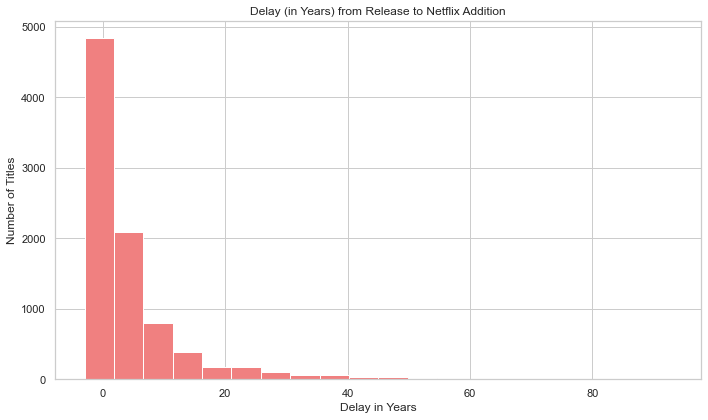

In [13]:
# 12. Calculate and plot how many years it took for content to appear on Netflix after release
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['delay_years'] = df['year_added'] - df['release_year']

plt.figure(figsize=(10, 6))
df['delay_years'].dropna().hist(bins=20, color='lightcoral')
plt.title('Delay (in Years) from Release to Netflix Addition')
plt.xlabel('Delay in Years')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

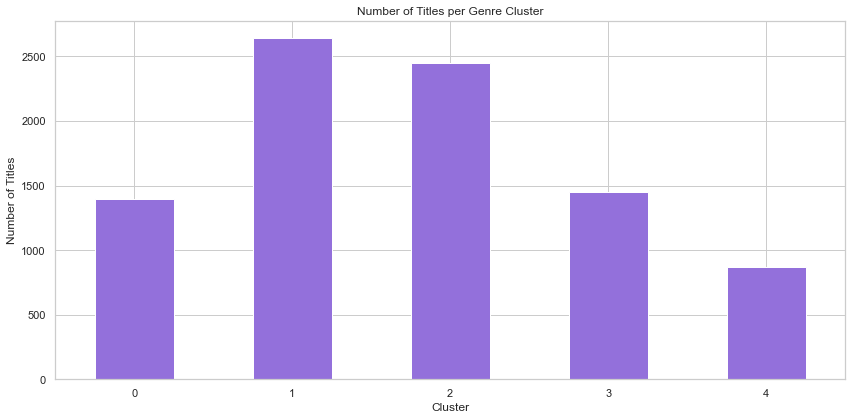

In [17]:
# 13. Use KMeans clustering to group Netflix titles based on their genres
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(df['listed_in'].dropna())

kmeans = KMeans(n_clusters=5, random_state=42)
df['genre_cluster'] = kmeans.fit_predict(X)

ax = df['genre_cluster'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')

plt.title('Number of Titles per Genre Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

       Movie       0.75      0.96      0.84      1214
     TV Show       0.77      0.28      0.41       548

    accuracy                           0.75      1762
   macro avg       0.76      0.62      0.63      1762
weighted avg       0.76      0.75      0.71      1762



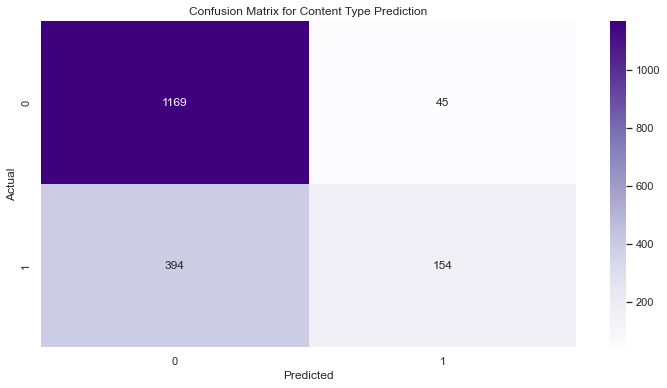

In [18]:
# 14. Predict content type using description text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df_model = df.dropna(subset=['description', 'type'])

X = df_model['description']
y = df_model['type']

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Content Type Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# 15. Topic modeling on descriptions using Latent Dirichlet Allocation (LDA)
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

feature_names = tfidf.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Top words for Topic #{idx}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print()

Top words for Topic #0:
['man', 'family', 'war', 'history', 'comedy', 'new', 'world', 'life', 'series', 'documentary']

Top words for Topic #1:
['finds', 'city', 'mother', 'family', 'new', 'love', 'life', 'man', 'woman', 'young']

Top words for Topic #2:
['home', 'old', 'family', 'school', 'new', 'save', 'friends', 'young', 'world', 'life']

Top words for Topic #3:
['woman', 'world', 'series', 'years', 'young', 'friends', 'man', 'life', 'love', 'family']

Top words for Topic #4:
['old', 'love', 'town', 'year', 'woman', 'man', 'young', 'family', 'life', 'new']



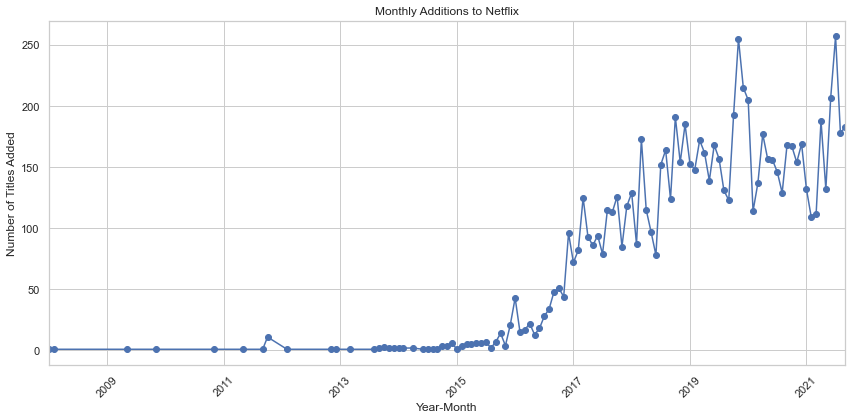

In [20]:
# 16. Plot content addition trend by month
df['year_month_added'] = df['date_added'].dt.to_period('M')

monthly_additions = df.groupby('year_month_added').size()

monthly_additions.plot(kind='line', marker='o')
plt.title('Monthly Additions to Netflix')
plt.xlabel('Year-Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# 17. Build a basic content recommender system based on descriptions
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X_tfidf)

def recommend(title, cosine_sim=cosine_sim):
    idx = df_model[df_model['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return df_model.iloc[movie_indices][['title', 'type']]

# Example usage
recommend("Breaking Bad")

title     type
6616                                          Dismissed    Movie
2388                                      Alexa & Katie  TV Show
1237                                           Mariposa    Movie
760   Fireplace 4K: Crackling Birchwood from Firepla...    Movie
1920                                    The Book of Sun    Movie

In [23]:
# SUMMARY OF FINDINGS
print("SUMMARY OF FINDINGS:")
print("• Netflix has more Movies than TV Shows.")
print("• Content addition peaked between 2017 and 2020.")
print("• USA is the leading country for Netflix titles.")
print("• TV-MA is the most common content rating, followed by TV-14 and R.")
print("• Dramas, Comedies, and Documentaries are the top genres on Netflix.")
print("• Most Netflix content is added within 0–5 years after its original release.")
print("• Common description keywords are 'family', 'life', 'love', and 'story'.")
print("• Content delays vary, but recent years show faster addition of new releases.")
print("• KMeans clustering grouped Netflix titles into 5 genre-based clusters.")
print("• Logistic Regression model predicts Movies vs TV Shows with good accuracy based on description text.")
print("• Topic modeling revealed main themes: Family, Crime, Travel, Comedy, and Emotional Stories.")
print("• Netflix added the highest number of titles in late 2018 and 2019.")
print("• A basic recommender system can suggest similar shows based on description similarity (e.g., recommending crime dramas for Breaking Bad fans).")

SUMMARY OF FINDINGS:
• Netflix has more Movies than TV Shows.
• Content addition peaked between 2017 and 2020.
• USA is the leading country for Netflix titles.
• TV-MA is the most common content rating, followed by TV-14 and R.
• Dramas, Comedies, and Documentaries are the top genres on Netflix.
• Most Netflix content is added within 0–5 years after its original release.
• Common description keywords are 'family', 'life', 'love', and 'story'.
• Content delays vary, but recent years show faster addition of new releases.
• KMeans clustering grouped Netflix titles into 5 genre-based clusters.
• Logistic Regression model predicts Movies vs TV Shows with good accuracy based on description text.
• Topic modeling revealed main themes: Family, Crime, Travel, Comedy, and Emotional Stories.
• Netflix added the highest number of titles in late 2018 and 2019.
• A basic recommender system can suggest similar shows based on description similarity (e.g., recommending crime dramas for Breaking Bad fan